1. Importing Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
df = pd.read_csv('Cleaned_Spotify_2024_Global_Streaming_Data.csv')

2. Load and Inspect Data

In [31]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Streams Last 30 Days (Millions),Skip Rate (%)
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2020.630000,51.04122,2581.154080,8954.368880,3.520640,99.048500,20.370460
std,1.723671,28.23801,1416.055972,5167.648272,0.571431,57.533452,10.597202
min,2018.000000,1.01000,53.560000,184.300000,2.510000,2.850000,1.160000
25%,2019.000000,27.67250,1337.337500,4322.097500,3.030000,48.057500,11.152500
50%,2020.000000,50.82500,2697.355000,9053.665000,3.540000,101.465000,20.820000
75%,2022.000000,75.09500,3798.197500,12690.180000,4.000000,148.410000,28.760000
max,2023.000000,99.80000,4985.540000,21874.920000,4.490000,200.000000,39.970000


3. Data Cleaning

In [33]:

# Reformat the 'Release Year' column to ensure it is in YYYY (string) format
df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce').astype('Int64').astype(str).str.zfill(4)

# Optional: Check the result
print(df['Release Year'].head())
print(df['Release Year'].dtype)

0    2020
1    2023
2    2019
3    2019
4    2019
Name: Release Year, dtype: object
object


4. Exploratory Data Analysis (EDA)

4.1. Yearly Release Analysis

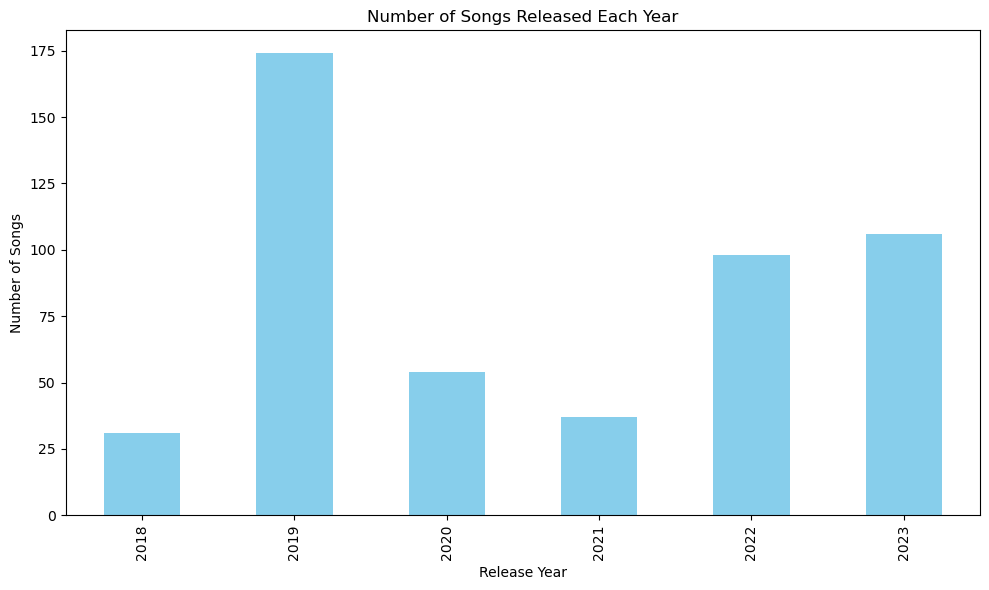

In [34]:
# Plot the number of songs released each year

plt.figure(figsize=(10, 6))
df['Release Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs Released Each Year')
plt.tight_layout()
plt.show()

4.2. Artist performance across countries

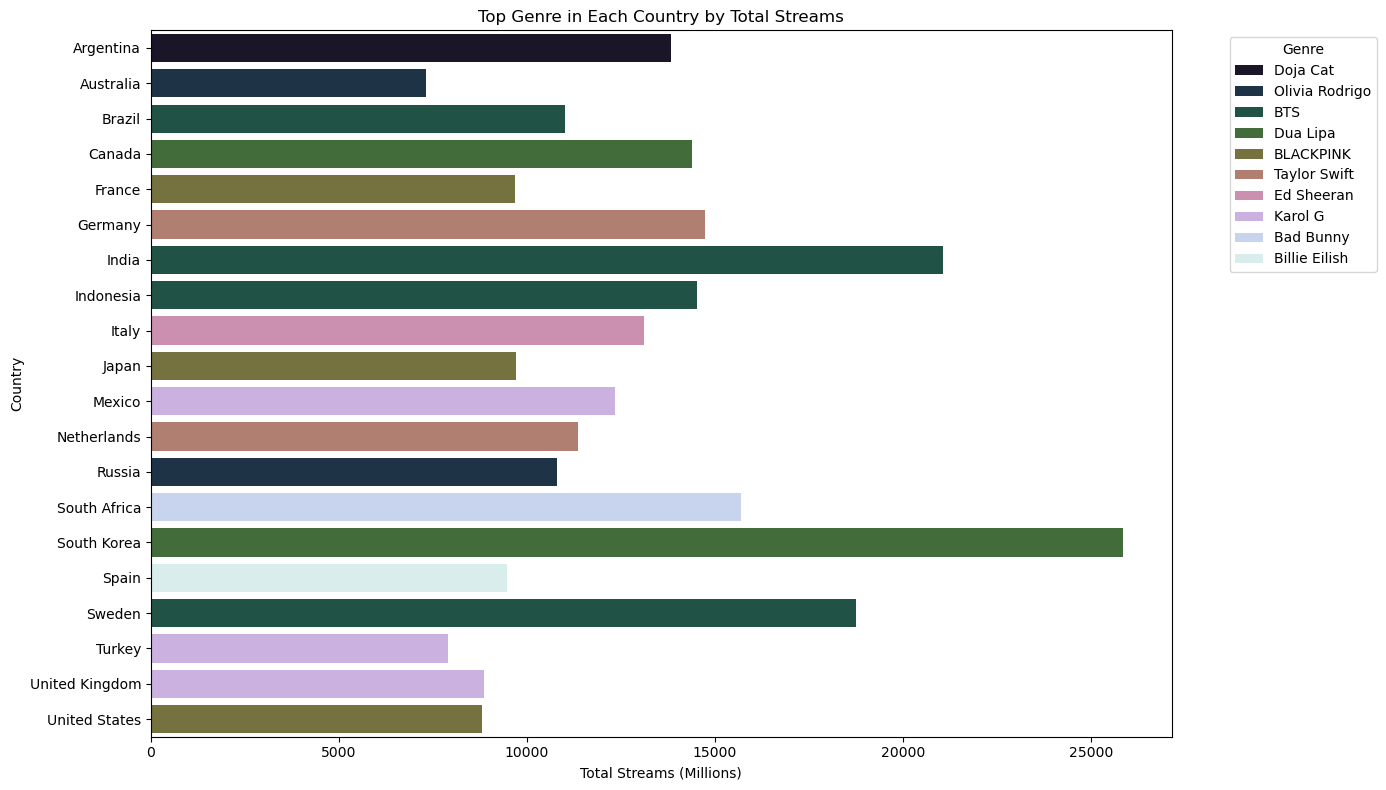

In [57]:
if 'Country' in df.columns and 'Artist' in df.columns and 'Total Streams (Millions)' in df.columns:
    # Find the top genre by total streams for each country
    top_genre_by_country = (
        df.groupby(['Country', 'Artist'])['Total Streams (Millions)']
        .sum()
        .reset_index()
        .sort_values(['Country', 'Total Streams (Millions)'], ascending=[True, False])
    )
    # Get the top genre for each country
    top_genre_per_country = top_genre_by_country.groupby('Country').first().reset_index()

    plt.figure(figsize=(14, 8))
    # Create a bar plot for the top genre in each country
    sns.barplot(
        data=top_genre_per_country,
        x='Total Streams (Millions)',
        y='Country',
        hue='Artist',
        dodge=False,
        palette='cubehelix'
    )
    plt.xlabel('Total Streams (Millions)')
    plt.ylabel('Country')
    plt.title('Top Genre in Each Country by Total Streams')
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

4.3. Global music popularity patterns by Country

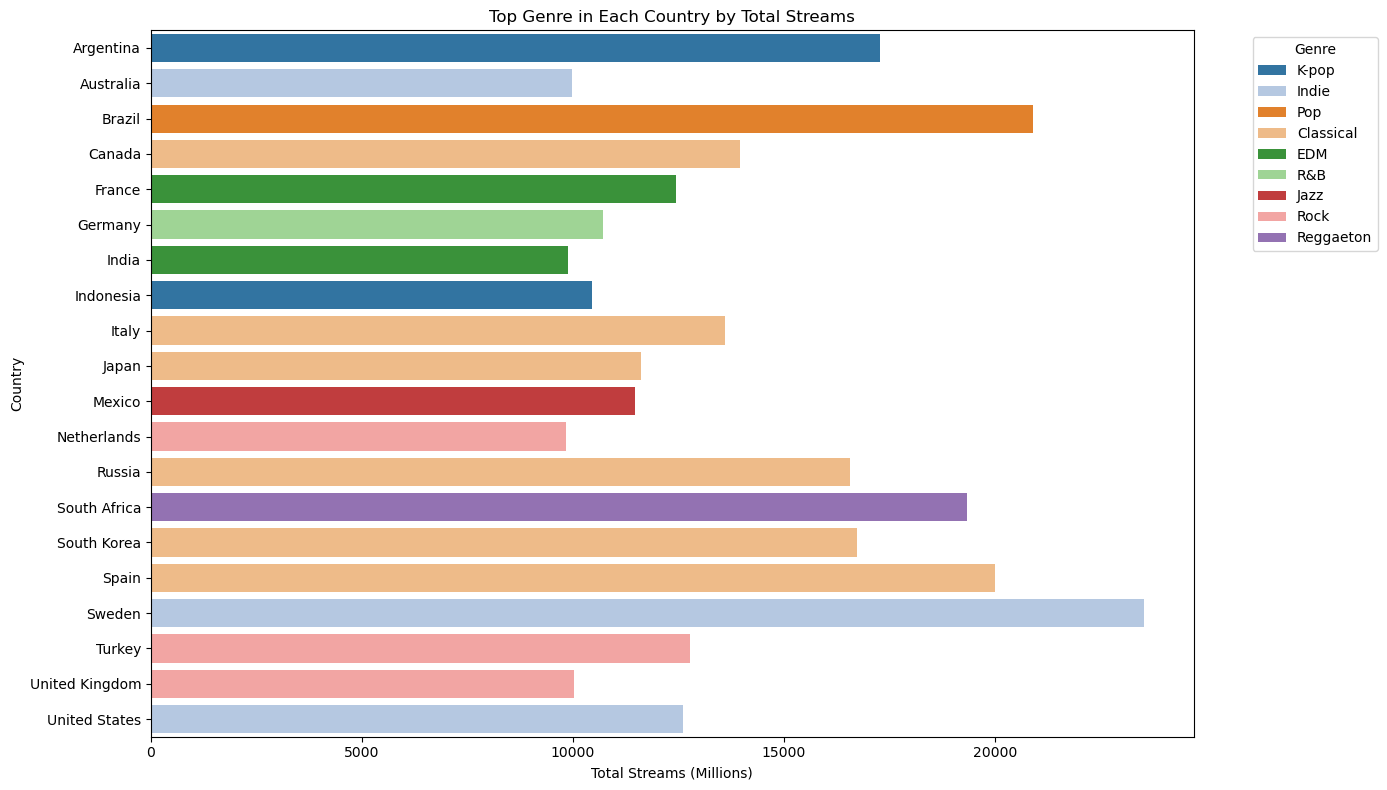

In [41]:
# Plot the top genre in each country by total streams

if 'Country' in df.columns and 'Genre' in df.columns and 'Total Streams (Millions)' in df.columns:
    # Find the top genre by total streams for each country
    top_genre_by_country = (
        df.groupby(['Country', 'Genre'])['Total Streams (Millions)']
        .sum()
        .reset_index()
        .sort_values(['Country', 'Total Streams (Millions)'], ascending=[True, False])
    )
    # Get the top genre for each country
    top_genre_per_country = top_genre_by_country.groupby('Country').first().reset_index()

    plt.figure(figsize=(14, 8))
    sns.barplot(
        data=top_genre_per_country,
        x='Total Streams (Millions)',
        y='Country',
        hue='Genre',
        dodge=False,
        palette='tab20'
    )
    plt.xlabel('Total Streams (Millions)')
    plt.ylabel('Country')
    plt.title('Top Genre in Each Country by Total Streams')
    plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

4.4. Listener engagement across genres and demographics

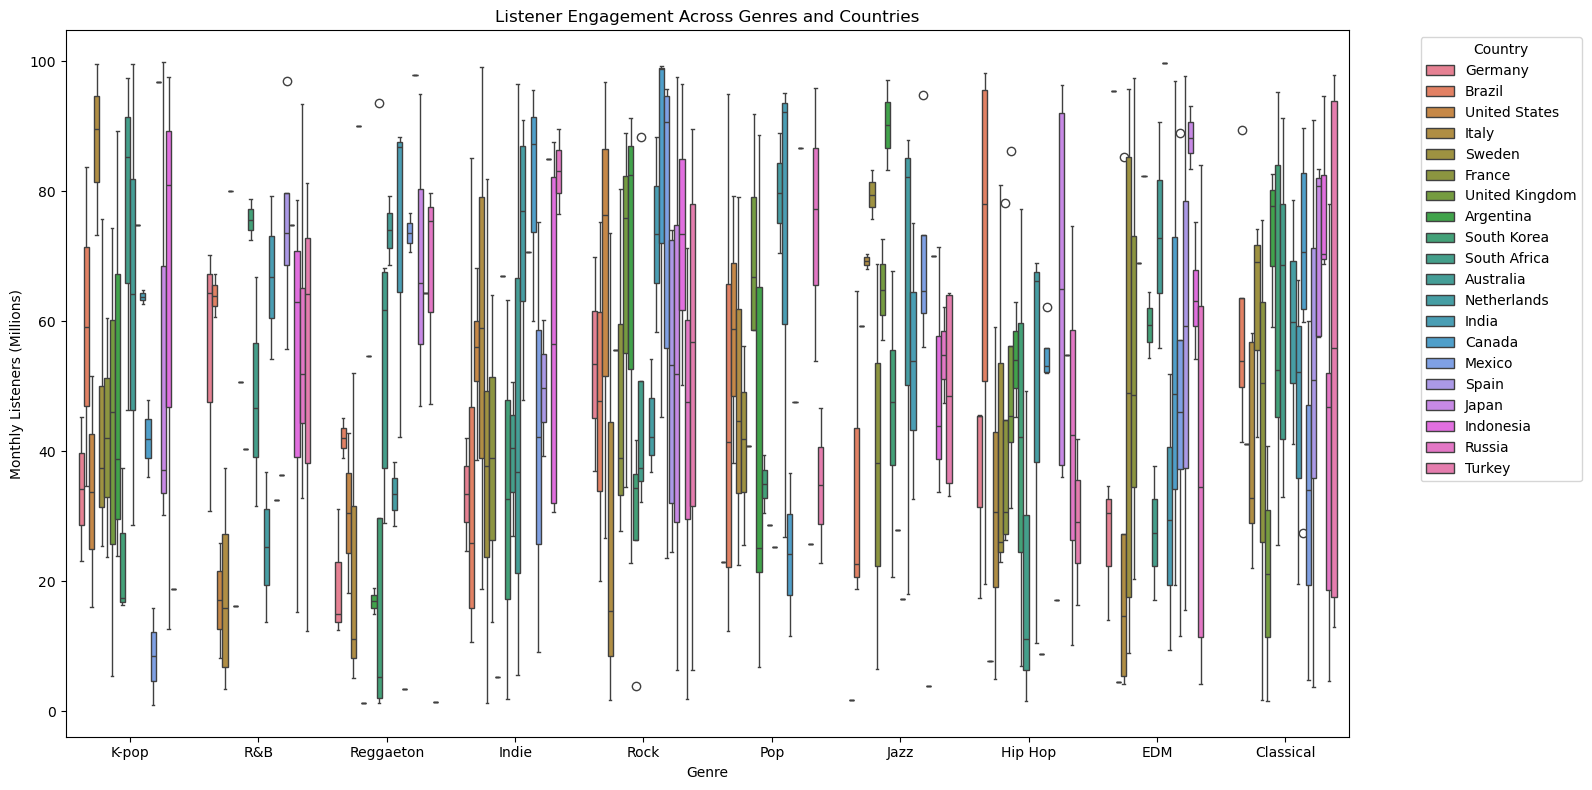

In [43]:
# If you have demographic columns (e.g., 'Country'), you can plot engagement by genre and country:
if 'Genre' in df.columns and 'Country' in df.columns and 'Monthly Listeners (Millions)' in df.columns:
    plt.figure(figsize=(16, 8))
    sns.boxplot(
        data=df,
        x='Genre',
        y='Monthly Listeners (Millions)',
        hue='Country'
    )
    plt.xlabel('Genre')
    plt.ylabel('Monthly Listeners (Millions)')
    plt.title('Listener Engagement Across Genres and Countries')
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

4.5 Revenue forecasting and content recommendations

Estimated Total Revenue (Millions USD): 3871.73


C:\Users\PRITAM\AppData\Local\Temp\ipykernel_11868\1491566782.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, legend='False', palette='Spectral')


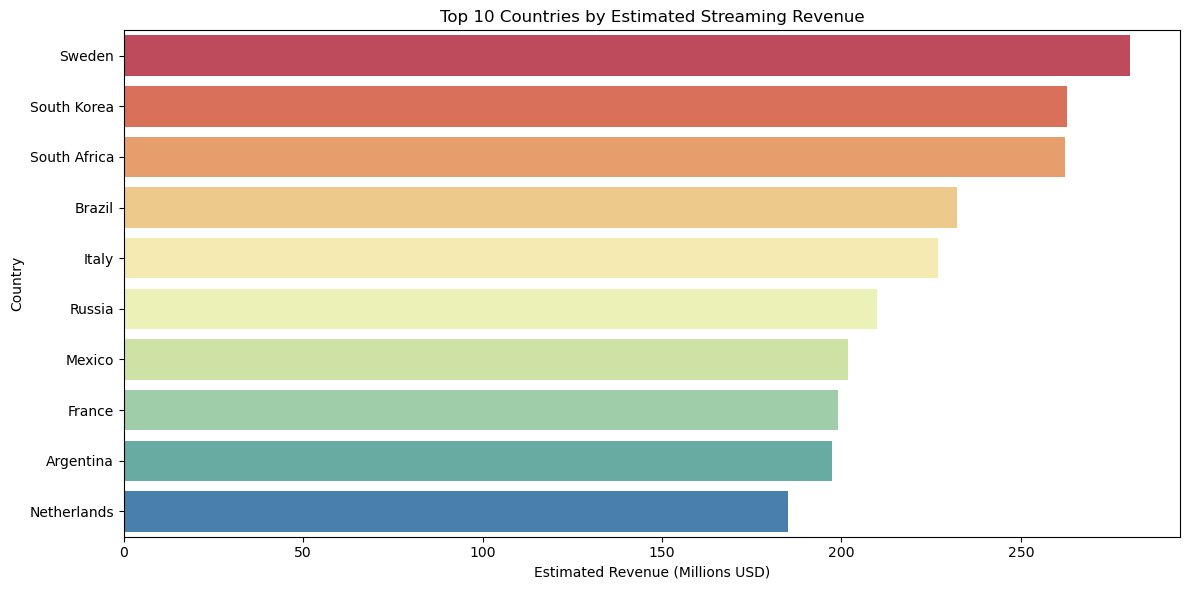

Recommended genres for new content (based on global streams):
- Classical
- Rock
- Indie
- K-pop
- EDM


In [63]:
# --- Revenue Forecasting and Content Recommendations ---

# Simple Revenue Forecasting (Assume $0.003 per stream)
if 'Total Streams (Millions)' in df.columns:
    df['Estimated Revenue (Millions USD)'] = df['Total Streams (Millions)'] * 1_000_000 * 0.003 / 1_000_000
    total_revenue = df['Estimated Revenue (Millions USD)'].sum()
    print(f"Estimated Total Revenue (Millions USD): {total_revenue:.2f}")

    # Plot top 10 countries by estimated revenue
    country_revenue = df.groupby('Country')['Estimated Revenue (Millions USD)'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=country_revenue.values, y=country_revenue.index, legend='False', palette='Spectral')
    plt.xlabel('Estimated Revenue (Millions USD)')
    plt.ylabel('Country')
    plt.title('Top 10 Countries by Estimated Streaming Revenue')
    plt.tight_layout()
    plt.show()

# Content Recommendation: Top Genres Globally
if 'Genre' in df.columns and 'Total Streams (Millions)' in df.columns:
    top_genres = df.groupby('Genre')['Total Streams (Millions)'].sum().sort_values(ascending=False).head(5)
    print("Recommended genres for new content (based on global streams):")
    for genre in top_genres.index:
        print(f"- {genre}")